# Exam 2 - 100 points

The mathematics of the Fourier Transform was developed on infinite waves. The Discrete Fourier Transform (DFT) is an implementation of the Fourier Transform for non-infinite waves. DFT has time complexity O(n<sup>2</sup>). The Fast Fourier Transform (FFT) is an implementation of DFT that takes less steps to arrive at the same solution. As a result, it manages to reduce the complexity of computing the DFT to O(n*log(n)), where n is the data size log(n) is log base 10.

1.) In your own words, describe what time complexity means and what are the implications at large n. How would you expect DFT and FFT to compare as the size of the data on which it is being applied increases?

Time complexity is a concept in computer science that relates the amount of time an algorithm takes to run to the size (amount) of input data. The above functions tell us that the DFT algorithm's execution time will increase as the square of the input data. In other words, 2 pieces of input data = 2<sup>2</sup> in execution time, 3 pieces of input data = 3<sup>2</sup> in execution time. FFT's time execution increases as the log of the size of the input data. The log function increases at a slower rate than x<sup>2</sup>. Thus, FFT will run faster at larger n than DFT.

2.) Visualize the time complexity of FFT and DFT. Specifically,
- plot the two time complexities on the same graph
- add a legend indicating which color goes with which complexity
- add x and y titles
- add a title
- limit the x-range of the plot to be [0,60]

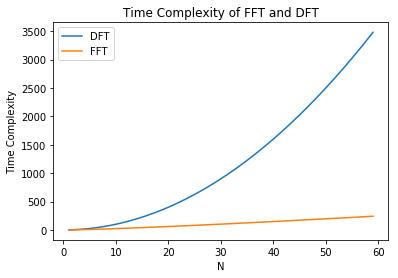

In [8]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(1,60,1)
dft = x**2
fft = x*np.log(x)
plt.plot(x, dft)
plt.plot(x, fft)
plt.ylabel('Time Complexity')
plt.xlabel('N')
plt.title('Time Complexity of FFT and DFT')
plt.legend(['DFT','FFT'])

You're the lead engineer on a project investigating the use of FFT for equipment condition monitoring. Specifically, you'd like to analyze rotating machinery. If the machines are working properly then you will see a single peak at the rotational frequency when you apply FFT to your data. No other peaks will be seen in the FFT if the machine is working properly. However, if the machinery is failing then vibrations will increase and the machine will not rotate at a consistent rate. In the case of parts failing, you'll see the rotational frequency as the strongest dominant peak in the frequency representation, but you'll also see peaks at other frequencies due to parts failing and the rotation rate not being consistent. The FFT will be used to diagnose faults, with a single peak in the frequency representation indicating an operational machine, and multiple peaks in the frequency representation indicating an impending failure.

3.) (5 points) You are given data from two machines in your project. These data are stored in machine1.csv and machine2.csv (provided in Joule along with this notebook), respectively. Both data files have two columns separated by commas. The first column is time and the second column is the wave resulting from the rotation of the machine (the amplitude of the wave). The sampling rate is 1000 times per second.

Read machine1.csv and visualize the data.

In [9]:
import pandas as pd

# Sampling rate 
sampling_rate = 1000 # Hz

data1 = pd.read_csv('machine1.csv')
data2 = pd.read_csv('machine2.csv')

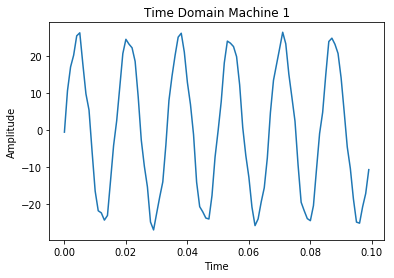

In [10]:
# Data plotting
plt.plot(data1['Time'], data1['Vibrations'])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Time Domain Machine 1');

4.) Read machine2.csv and visualize the data.

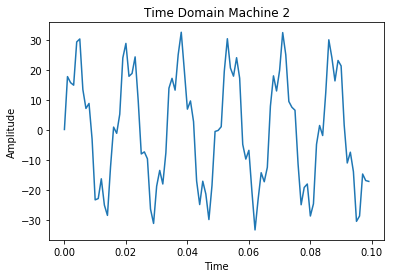

In [11]:
# Data plotting
plt.plot(data2['Time'], data2['Vibrations'])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Time Domain Machine 2');

5.) (10 points) You may be able to tell which machine is failing from these visualizations. You can probably already see inconsistencies in one of the waves. However, let's provide more evidence by looking at the FFT. Perform FFT on both machine1 and machine2 and visualize the results

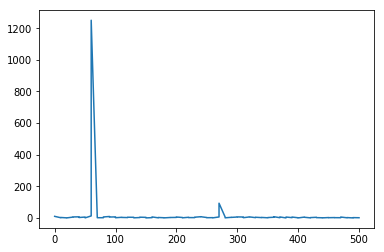

In [13]:
import scipy.fftpack
fft = scipy.fftpack.rfft(data1['Vibrations'])
freqs = scipy.fftpack.rfftfreq(len(fft)) * sampling_rate
plt.plot(freqs, np.abs(fft))

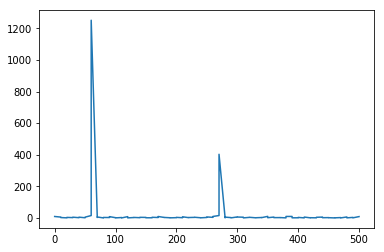

In [14]:
fft = scipy.fftpack.rfft(data2['Vibrations'])
freqs = scipy.fftpack.rfftfreq(len(fft)) * sampling_rate
plt.plot(freqs, np.abs(fft))

6.) Recall that the domininant peak (largest magnitude) is the rotation of the machine. How many times per second do machine1 and machine2 rotate? For full credit, find the exact value, not an approximation by reading from the graph.

In [21]:
# the highest peak in our fft
mx = max(np.abs(fft))

# need to convert freqs to a list, currently it's a numpy array
fftList = (np.abs(fft)).tolist()

# where it occurs on the x-axis
r = fftList.index(mx)
print("The exact rotational of the machines is", freqs[r], "Hz")

The exact rotational of the machines is 60.0 Hz


7.) How do you interpret the FFT results? Which machine is more in danger of failing? If you could only supply maintanance to one machine, which would you choose?

Both machines have a second peak near the rotation rate peak (60 Hz). This indicates that both machines have parts failing and the rotation rates of both machines are not consistent. Yet, machine 2's second peak is at least 2 times as large as the second peak of machine 1. This indicates that machine 2 is more in danger of failing.

8.) Use the r-squared statistic to determine if the following x and y data are better fit by a third order polynomial or a fourth order polynomial.

For reference, a third order polynomial has the form: 
a*x<sup>3</sup>+b*x<sup>2</sup>+c*x+d
and a fourth order polynomial has the form:
a*x<sup>4</sup>+b*x<sup>3</sup>+c*x<sup>2</sup>+d*x+e


In [63]:
x_data = [0.33807103, 0.30591163, 0.45288602, 0.73333478, 0.6815493,  0.72446816]
y_data = [0.37568632, 0.34643657, 0.5755311,  0.41885812, 0.93361988, 0.5884533]

In [67]:
import scipy.optimize
def third(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d
    
fit2, covar2 = scipy.optimize.curve_fit(third, x_data, y_data)
print("Best fit to third order polynomial: ", fit2)

Best fit to third order polynomial:  [-86.76972701 124.78870655 -55.27015332   8.09654787]


In [64]:
def fourth(x, a, b, c, d, e):
    return a*x**4 + b*x**3 + c*x**2 + d*x + e
    
fit1, covar1 = scipy.optimize.curve_fit(fourth, x_data, y_data)
print("Best fit to fourth order polynomial: ", fit1)

Best fit to fourth order polynomial:  [-205.63751284  352.7282929  -216.1481996    57.95340778   -5.45305738]


In [73]:
a=fit1[0]
b=fit1[1]
c=fit1[2]
d=fit1[3]
e=fit1[4]
x_data = np.array(x_data)
y1=a*x_data**4 + b*x_data**3 + c*x_data**2 + d*x_data + e
residuals = y_data - y1
ss_res = np.sum(residuals**2)
ss_tot = np.sum((x_data-np.mean(x_data))**2)
r_squared = 1 - (ss_res / ss_tot)
print("R-squared fourth order:", r_squared)

a=fit2[0]
b=fit2[1]
c=fit2[2]
d=fit2[3]
y2=a*x_data**3 + b*x_data**2 + c*x_data + d
residuals = y_data - y2
ss_res = np.sum(residuals**2)
ss_tot = np.sum((x_data-np.mean(x_data))**2)
r_squared = 1 - (ss_res / ss_tot)
print("R-squared third order:", r_squared)

R-squared fourth order: 0.9931378055154726
R-squared third order: 0.9627512991174634


9.) Create a list of x values using: x=np.arange(0,1,.01)

- plot x_data and y_data using a scatter plot
- on the same graph, plot x and the best fit third order equation
- on the same graph, plot x and the best fit fourth order equation
- add a legend to indicate which plot is the third order and which is the fourth order

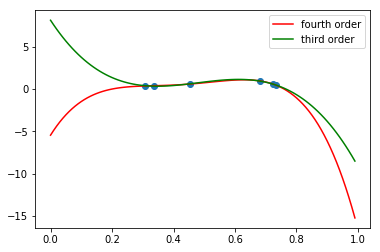

In [105]:
x=np.arange(0,1,.01)

a=fit1[0]
b=fit1[1]
c=fit1[2]
d=fit1[3]
e=fit1[4]
y1=a*x**4 + b*x**3 + c*x**2 + d*x + e
plt.plot(x,y1,color='red')

a=fit2[0]
b=fit2[1]
c=fit2[2]
d=fit2[3]
y2=a*x**3 + b*x**2 + c*x + d
plt.plot(x,y2,color='green')

plt.scatter(x_data,y_data)
plt.legend(['fourth order','third order'])

10.) An Electroencephalogram (EEG) measures brain waves. The frequencies of these waves indicate what the person was doing when the EEG measurements were taken. Neuroscientists have created the following table.

|      Frequency Range    |  State of Mind |
|:-------------:|------:|
|  0.5Hz–4Hz | Deep sleep |
| 4Hz–8Hz |    Drowsiness (first stage of sleep)  |
| 8Hz–14Hz | Relaxed but alert |
| 14Hz–30Hz | Highly alert and focused |

Given an EEG, neuroscientists can determine which range of frequencies have the largest magnitude, and use that information to determine which of the above "states of mind" the person was in when the measurements were taken. This is analogous to how we were able to determine which piano note was played without ever hearing the recording.

Let's start by reading the comma separated file eeg.csv (on Joule) and visualizing it. The EEG file contains two columns: time and amplitude. The sampling rate is 1000 times per second.

Read the data and create a plot of time (x-axis) and amplitude (y-axis). For an EEG the amplitude is measured in volts; however, the voltage output from our brains is very small so our data is supplied in units of micro-Volts (10<sup>-6</sup> Volts). Label your plot using seconds on the x-axis and micro-Volts on the y-axis

Text(0.5,0,'Time (seconds)')

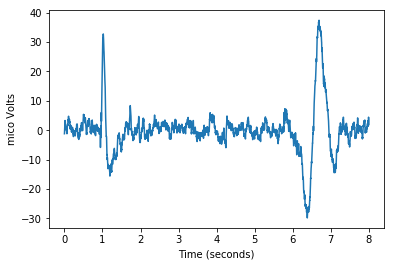

In [95]:
import numpy as np
import matplotlib.pyplot as plt

data3 = pd.read_csv('eeg.csv')
plt.plot(data3['Time'], data3['microVolts'])
plt.ylabel('mico Volts')
plt.xlabel('Time (seconds)')

11.) Determine which state of mind (from the above table) the person was in when the EEG was taken.

(0, 10)

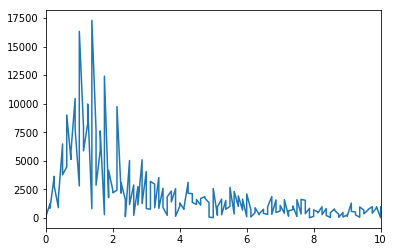

In [97]:
import scipy.fftpack
fft = scipy.fftpack.rfft(data3['microVolts'])
freqs = scipy.fftpack.rfftfreq(len(fft)) * 1000.
plt.plot(freqs, np.abs(fft))
plt.xlim(0,10)

The peaks of the FFT are in the range 0.5Hz to 4Hz. We can conclude the EEG was taken when the person was sleeping.

# Extra Credit

The following spectrogram is from a second EEG.

![alt text](http://curiositry.github.io/assets/img/autodidacts/openbci-binaural/openbci_binaural_second_run_channel8_combined_spect.png)

EC 1.) What is a spectrogram? How does it relate to FFT?

EC 2.) What 'state of mind' was this person in while the EEG was being taken? How do you know?

EC 3.) Was the person in this state for the entire duration of the EEG? How do you know?